In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [7]:
data = pd.read_csv('one_week_cpu_usage_data_rounded.csv')

In [8]:
# Exploratory Data Analysis (EDA)
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cluster               10080 non-null  object 
 1   instance              10080 non-null  object 
 2   timestamp             10080 non-null  object 
 3   cpu_usage_percentage  10080 non-null  float64
dtypes: float64(1), object(3)
memory usage: 315.1+ KB
None
       cpu_usage_percentage
count          10080.000000
mean              18.046184
std               18.270837
min                0.010000
25%                7.997500
50%               15.710000
75%               23.460000
max              149.690000


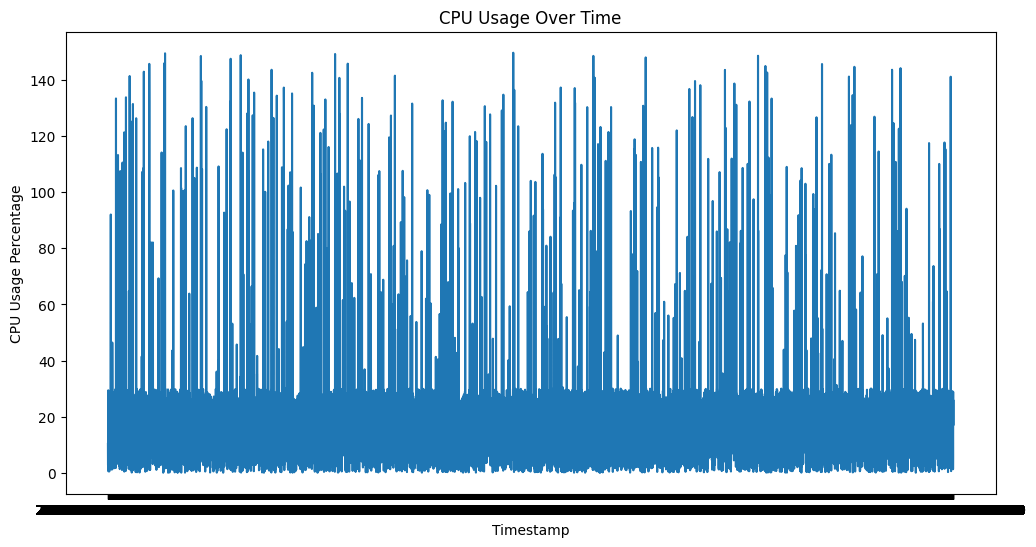

In [9]:
# Plot CPU usage over time
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['cpu_usage_percentage'])
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage Percentage')
plt.title('CPU Usage Over Time')
plt.show()

In [10]:
# Prepare data for LSTM
data = data.sort_values(by='timestamp')
cpu_usage = data['cpu_usage_percentage'].values
cpu_usage = cpu_usage.reshape(-1, 1)

In [11]:
# Normalize the data
scaler = MinMaxScaler()
cpu_usage_scaled = scaler.fit_transform(cpu_usage)

In [12]:
# Split the data into train and test sets
train_size = int(len(cpu_usage_scaled) * 0.8)
train_data = cpu_usage_scaled[:train_size]
test_data = cpu_usage_scaled[train_size:]

In [13]:
# Create input and output sequences
def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # Number of time steps for input sequence
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [14]:
# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
# Build the LSTM model 
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, cpu_usage.shape[1]), return_sequences=True))
model.add(Dropout(0.2))  
model.add(LSTM(64))
model.add(Dropout(0.2))  
model.add(Dense(1)) 
model.compile(optimizer='adam', loss='mse')

/Users/tusharbhatia/tfod/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test)) 

Epoch 1/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0177 - val_loss: 0.0124
Epoch 2/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0164 - val_loss: 0.0131
Epoch 3/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0159 - val_loss: 0.0125
Epoch 4/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0152 - val_loss: 0.0127
Epoch 5/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0153 - val_loss: 0.0124
Epoch 6/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0153 - val_loss: 0.0124
Epoch 7/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0169 - val_loss: 0.0124
Epoch 8/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0168 - val_loss: 0.0124
Epoch 9/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0158 - val_loss: 0.0124
Epoch 10/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0157 - val_loss: 0.0127
Epoch 11/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0167 - val_loss: 0.0124
Epoch 12/150
252/252 ━━━━━━━━━

252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0172 - val_loss: 0.0124
Epoch 68/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0160 - val_loss: 0.0124
Epoch 69/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0154 - val_loss: 0.0126
Epoch 70/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0145 - val_loss: 0.0124
Epoch 71/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0155 - val_loss: 0.0125
Epoch 72/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0170 - val_loss: 0.0124
Epoch 73/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0151 - val_loss: 0.0124
Epoch 74/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0172 - val_loss: 0.0124
Epoch 75/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0153 - val_loss: 0.0125
Epoch 76/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0158 - val_loss: 0.0124
Epoch 77/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0159 - val_loss: 0.0124
Epoch 78/150
252/252 ━━━━━━━━━━━━━

252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0145 - val_loss: 0.0125
Epoch 134/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0160 - val_loss: 0.0125
Epoch 135/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0146 - val_loss: 0.0126
Epoch 136/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0159 - val_loss: 0.0124
Epoch 137/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0160 - val_loss: 0.0124
Epoch 138/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0169 - val_loss: 0.0125
Epoch 139/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0161 - val_loss: 0.0125
Epoch 140/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0154 - val_loss: 0.0125
Epoch 141/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0153 - val_loss: 0.0126
Epoch 142/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0163 - val_loss: 0.0127
Epoch 143/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0143 - val_loss: 0.0125
Epoch 144/150
252/252 ━━

In [17]:
# Forecast future values
future_steps = 24  # Number of future steps to forecast
future_data = test_data[-seq_length:]
future_data = future_data.reshape(1, seq_length, 1)

future_predictions = []
for _ in range(future_steps):
    prediction = model.predict(future_data)
    future_predictions.append(prediction[0, 0])
    future_data = np.roll(future_data, -1, axis=1)
    future_data[:, -1, :] = prediction

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print('Future Predictions:')
for i, pred in enumerate(future_predictions):
    print(f'Step {i+1}: Predicted CPU Usage: {pred[0]:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Future Predictions:
Step 1: Predicted CPU Usage: 17.84
Step 2: Predicted CPU Usage: 17.47
Step 3: Predicted CPU U

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


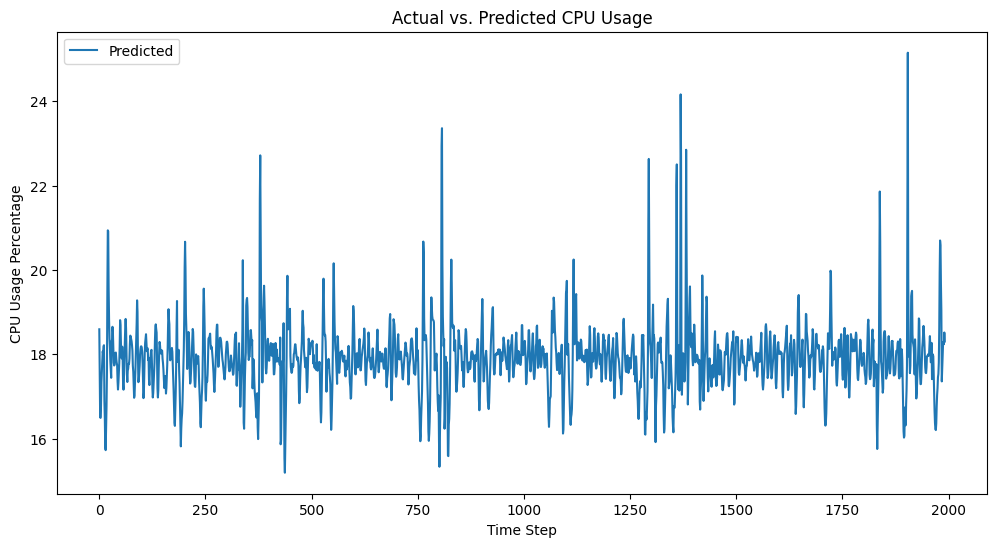

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Prepare data for plotting
actual = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(y_pred)

# Create the plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted')
plt.xlabel('Time Step')
plt.ylabel('CPU Usage Percentage')
plt.title('Actual vs. Predicted CPU Usage')
plt.legend()
plt.show()

In [19]:
import keras 
print('Keras version:', keras.__version__)

Keras version: 3.3.2


In [20]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [21]:
model.save('cpu_usage_forecast_model.keras')